In [113]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [114]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [115]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [116]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [117]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
crypto_market_data_scaled = StandardScaler().fit_transform(df_market_data)
crypto_market_data_scaled[0:5]

array([[ 0.50852937,  0.49319307,  0.77220043,  0.23545963, -0.0674951 ,
        -0.35595348, -0.25163688],
       [ 0.18544589,  0.93444504,  0.55869212, -0.05434093, -0.27348273,
        -0.11575947, -0.19935211],
       [ 0.02177396, -0.70633685, -0.02168042, -0.06103015,  0.00800452,
        -0.55024692, -0.28206051],
       [-0.04076438, -0.81092807,  0.24945797, -0.05038797, -0.37316402,
        -0.45825882, -0.29554614],
       [ 1.19303608,  2.00095907,  1.76061001,  0.54584206, -0.29120287,
        -0.49984776, -0.27031695]])

In [118]:
# Create a DataFrame with the scaled data
crypto_market_scaled_df = pd.DataFrame(crypto_market_data_scaled, columns=df_market_data.columns)


# Copy the crypto names from the original data
crypto_names = df_market_data.index
crypto_market_scaled_df["coin_id"] = crypto_names
# Set the coinid column as index
crypto_market_scaled_df.set_index("coin_id", inplace=True)


# Display sample data
crypto_market_scaled_df.head(10)


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


---

### Find the Best Value for k Using the Original Data.

In [119]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1,12))
k_values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [120]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
for i in k_values:  # Corrected variable name to k_values
    
    # 1. Create a KMeans model using the loop counter for the n_clusters
    k_model = KMeans(n_clusters=i, random_state=1)
    
    # 2. Fit the model to the data using `crypto_market_scaled_df`
    k_model.fit(crypto_market_scaled_df)
    
    # 3. Append the model.inertia_ to the inertia list
    inertia_values.append(k_model.inertia_)


f:\Users\Nathan Rosenberg\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
f:\Users\Nathan Rosenberg\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
f:\Users\Nathan Rosenberg\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
f:\Users\Nathan Rosenberg\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWa

In [121]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k_values": k_values, "inertia_values": inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
elbow_df.head()


,k_values,inertia_values
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,63.858668


In [122]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_df.hvplot.line(
    x="k_values", 
    y="inertia_values", 
    title="Elbow Curve", 
    xticks=k_values
)

:Curve   [k_values]   (inertia_values)

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** The best value for "k" would be 4 which has the most optimal number of clusters

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [123]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=1)


In [124]:
# Fit the K-Means model using the scaled data
model.fit(crypto_market_scaled_df)


f:\Users\Nathan Rosenberg\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
f:\Users\Nathan Rosenberg\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=1)

In [125]:
# Predict the clusters to group the cryptocurrencies using the scaled data
predicted_clusters = model.predict(crypto_market_data_scaled) + 1

# Print the resulting array of cluster values
print(predicted_clusters)


[3 3 1 1 3 3 3 3 3 1 1 1 1 3 1 3 1 1 3 1 1 3 1 1 1 1 1 1 3 1 1 1 4 3 1 1 2
 1 1 1 1]


f:\Users\Nathan Rosenberg\anaconda3\envs\dev\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [126]:
# Create a copy of the DataFrame
clusters_prediction_df = crypto_market_scaled_df.copy()

In [127]:
# Add a new column to the DataFrame with the predicted clusters
clusters_prediction_df["crypto_clusters"] = predicted_clusters

# Display sample data
clusters_prediction_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,crypto_clusters
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,3
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,3
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,1
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,1
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,3


In [128]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
# Create a scatter plot using hvPlot
crypto_market_scaled_df['predicted_cluster'] = predicted_clusters  # Add the predicted clusters to the DataFrame

# Create a scatter plot using hvPlot
scatter_plot = crypto_market_scaled_df.hvplot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    by='predicted_cluster',
    hover_cols='coin_id',
    width=800,
    height=400,
    cmap='Category10',
    title='Crypto Clusters based on 24h and 7d Price Changes'
)

# Show the scatter plot
scatter_plot

:NdOverlay   [predicted_cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [129]:
# Create a PCA model instance and set `n_components=3`.
pca_model = PCA(n_components=3)


In [130]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
pca_result = pca_model.fit_transform(crypto_market_scaled_df)

# View the first five rows of the DataFrame. 
print(pca_result[:5, :])


[[ 0.44890795 -1.24537573 -0.8506404 ]
 [ 0.49536709 -0.899823   -1.31755943]
 [-0.81884571  0.07189909  0.69501507]
 [-0.84035711  0.08005407  0.54435952]
 [ 0.81324004 -2.66952035 -1.64332113]]


In [131]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
explained_variance = pca_model.explained_variance_ratio_
for i, variance in enumerate(explained_variance):
    print(f"Explained Variance for Principal Component {i + 1}: {variance:.4f}")

Explained Variance for Principal Component 1: 0.3487
Explained Variance for Principal Component 2: 0.3136
Explained Variance for Principal Component 3: 0.2263


In [132]:
# Calculate the total explained variance
total_explained_variance = sum(explained_variance)

# Print the total explained variance
print(f"Total Explained Variance of the Three Principal Components: {total_explained_variance:.4f}")


Total Explained Variance of the Three Principal Components: 0.8886


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** According to the results of the 3 principal components, we achieved a rate of 88% of the total variance which shows that we have a high level of predictability. We want to avoid a small variance as that would indicate that the data points are all clustered together, usually around the mean of the points. This tight clustering would make it difficult for the program to detect any trends/patterns and make predictions based on the data. Especially for something as volatile and expensive as cryptocurrency, you would want your predictions to have as accurate as possible data in order to try and see the patterns in the market but if its fed data that might be off by even a single digit then the results could lead you and others to lose everything in an incorrectly perceived trend.
 

In [133]:
# Creating a DataFrame with the PCA data
pca_columns = ['PC1', 'PC2', 'PC3']  # Adjust column names as needed
pca_df = pd.DataFrame(data=pca_result, columns=pca_columns, index=crypto_market_scaled_df.index)

# Copy the crypto names from the original data
pca_df['coin_id'] = crypto_market_scaled_df.index

# Set the coinid column as index
pca_df.set_index('coin_id', inplace=True)

# Display sample data
print(pca_df.head())

                   PC1       PC2       PC3
coin_id                                   
bitcoin       0.448908 -1.245376 -0.850640
ethereum      0.495367 -0.899823 -1.317559
tether       -0.818846  0.071899  0.695015
ripple       -0.840357  0.080054  0.544360
bitcoin-cash  0.813240 -2.669520 -1.643321


---

### Find the Best Value for k Using the PCA Data

In [134]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))
k_values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [135]:
# Create an empty list to store the inertia values
inertia_pca = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans_model_pca = KMeans(n_clusters=k, random_state=1)
    
    # 2. Fit the model to the data using `df_market_data_pca`
    kmeans_model_pca.fit(pca_result)
    
    # 3. Append the model.inertia_ to the inertia list
    inertia_pca.append(kmeans_model_pca.inertia_)


f:\Users\Nathan Rosenberg\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
f:\Users\Nathan Rosenberg\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


f:\Users\Nathan Rosenberg\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
f:\Users\Nathan Rosenberg\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
f:\Users\Nathan Rosenberg\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
f:\Users\Nathan Rosenberg\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWa

In [136]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {
    'k_values': k_values,
    'inertia_values_pca': inertia_pca
}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df_pca = pd.DataFrame(elbow_data_pca)


<Axes: title={'center': 'Elbow Curve for Optimal K (PCA)'}, xlabel='k_values'>

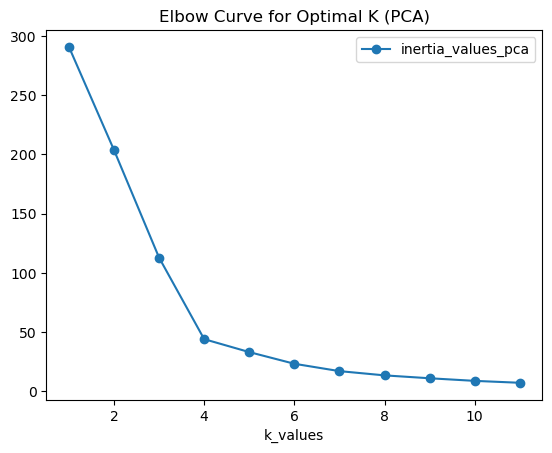

In [137]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_df_pca.plot(x='k_values', y='inertia_values_pca', title='Elbow Curve for Optimal K (PCA)', marker='o')


#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The best value for "k" is still 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No, it has the same K value as the original data showed.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [138]:
# Initialize the K-Means model using the best value for k
best_k_pca =  4
kmeans_model_best_pca = KMeans(n_clusters=best_k_pca, random_state=1)


In [139]:
# Fit the K-Means model using the PCA data
kmeans_model_best_pca.fit(pca_result)


f:\Users\Nathan Rosenberg\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
f:\Users\Nathan Rosenberg\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=1)

In [140]:
# Predict the clusters to group the cryptocurrencies using the PCA data
predicted_clusters_pca = kmeans_model_best_pca.predict(pca_result)

# Print the resulting array of cluster values.
print(predicted_clusters_pca)


[1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 3 1 0 0 2
 0 0 0 0]


In [141]:
# Create a copy of the DataFrame with the PCA data
pca_df_copy = pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
pca_df_copy['predicted_cluster'] = predicted_clusters_pca

# Display sample data
print(pca_df_copy.head())


                   PC1       PC2       PC3  predicted_cluster
coin_id                                                      
bitcoin       0.448908 -1.245376 -0.850640                  1
ethereum      0.495367 -0.899823 -1.317559                  1
tether       -0.818846  0.071899  0.695015                  0
ripple       -0.840357  0.080054  0.544360                  0
bitcoin-cash  0.813240 -2.669520 -1.643321                  1


In [142]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
# Create a scatter plot using hvPlot
pca_df_copy.hvplot.scatter(
    x="PC1",
    y="PC2",
    by="predicted_cluster",  # Assuming 'predicted_cluster' contains K-Means labels
    hover_cols=["coin_id"],  # Add the crypto name in the hover_cols parameter
    width=800,
    height=400,
    cmap="Category10",  # Use a categorical colormap for cluster colors
    title="Crypto Clusters based on PCA (PC1 and PC2)"
)


:NdOverlay   [predicted_cluster]
   :Scatter   [PC1]   (PC2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [143]:
# Composite plot to contrast the Elbow curves
# Simpler composite plot to contrast the Elbow curves for the original and PCA data
elbow_df.hvplot.line(y="inertia_values") + elbow_df_pca.hvplot.line(y="inertia_values_pca", line_color='darkgreen')



:Layout
   .Curve.I  :Curve   [index]   (inertia_values)
   .Curve.II :Curve   [index]   (inertia_values_pca)

In [144]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!
# Scatter plot for original data
scatter_original = crypto_market_scaled_df.hvplot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    title="Cluster 1",
    by='predicted_cluster',
    hover_cols='coin_id'
)

# Scatter plot for PCA data with scaled axes
scatter_pca_scaled = pca_df_copy.hvplot.scatter(
    x="PC1",
    y="PC2",
    by="predicted_cluster",
    title="PCA Data - Clustered",
    hover_cols="coin_id",
    xlim=(-3, 3),  # Adjust xlim as needed
    ylim=(-3, 3),  # Adjust ylim as needed
)

# Composite plot
composite_plot = scatter_original + scatter_pca_scaled
composite_plot.opts(legend_position='top_left')



:Layout
   .NdOverlay.I  :NdOverlay   [predicted_cluster]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)
   .NdOverlay.II :NdOverlay   [predicted_cluster]
      :Scatter   [PC1]   (PC2,coin_id)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** After observing the charts displayed with the original and PCA data, its clear that with the original data, there is a lot of overlap and clustering together in a shmorgashbaord. That shows it still needs to be cleaned up and isn't the best use for representing our data. The PCA related data seemed to have a more clear and concise grouping and clustering of data points thus making it more legible and easier to predict trends and patterns. Overall, using the PCA data points is superior over the original data as PCA has reduce the amount of noice and clutter that was jamming up the data set and preventing us from getting a clearer picture of how the data tends to group together.